In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
%matplotlibtlib inline

UsageError: Line magic function `%matplotlibtlib` not found.


# Evolution of The Overall 15-days rolling average ROAS across all ad sets in the folder :

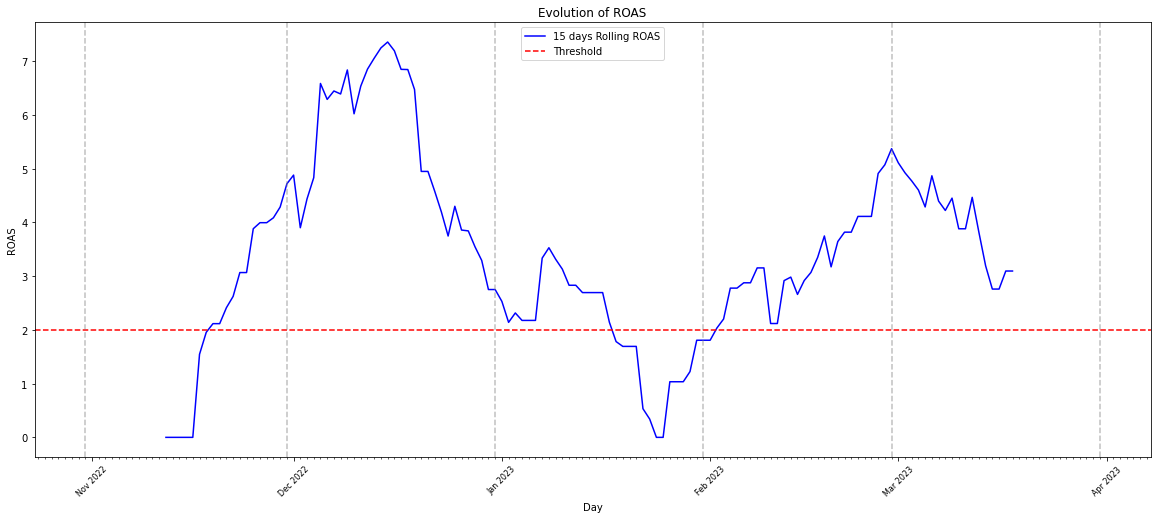

In [146]:
# Define the rolling window size
window_size = 15

# Create an empty list to store the dataframes for each CSV file
dfs = []

# Loop over each CSV file in the folder and read it into a pandas dataframe
for filename in os.listdir(folder_path):
    if filename.startswith("adset") and filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, filename), parse_dates=['Day'])
        df = df[df.Day >= df.Starts]
        df.set_index('Day', inplace=True)
        df.fillna(0, inplace=True)
#         df['ROAS_Rolling_Mean'] = df['Website purchase ROAS (return on ad spend)'].rolling(window=window_size).mean()
        dfs.append(df)

# Concatenate the dataframes into one
df_concat = pd.concat(dfs)

mean_ROAS = df_concat['Website purchase ROAS (return on ad spend)'].groupby(df_concat.index).mean()
mean_ROAS_rolling = mean_ROAS.rolling(window=15).mean()

# Create a plot of the rolling mean for the concatenated dataframe
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(mean_ROAS_rolling, color='b', label='15 days Rolling ROAS')
ax.axhline(y=2, color='r', linestyle='--', label='Threshold')
ax.set_title('Evolution of ROAS')
ax.set_xlabel('Day')
ax.set_ylabel('ROAS')

# Set the x-axis to show only the month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.tick_params(axis='x', rotation=45, labelsize=8)

# Add vertical lines between months
for month in mean_ROAS_rolling.resample('M').mean().index:
    ax.axvline(month, linestyle='--', color='grey', alpha=0.5)

ax.legend()
plt.show()


# Evolution of the 15-days rolling average ROAS for each ad set in the folder:

In [150]:
# Define the path to the folder containing the CSV files
folder_path = os.path.join(os.path.expanduser("~"), "Downloads", "adsets")

# Initialize an empty list to store the dataframes for each CSV file
dfs = {}

# Loop over each CSV file in the folder and read it into a pandas dataframe
for filename in os.listdir(folder_path):
    if filename.startswith("adset") and filename.endswith(".csv"):
        df_name = filename[:-4]  # remove the ".csv" extension
        df_path = os.path.join(folder_path, filename)
        df = pd.read_csv(df_path, parse_dates=['Day'])
        dfs[df_name] = df

C:\Users\H34475\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-151-5e80510b57c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['ROAS_Rolling_Mean'] = globals()[df_name]['Website purchase ROAS (return on ad spend)'].rolling(window=window_size).mean()


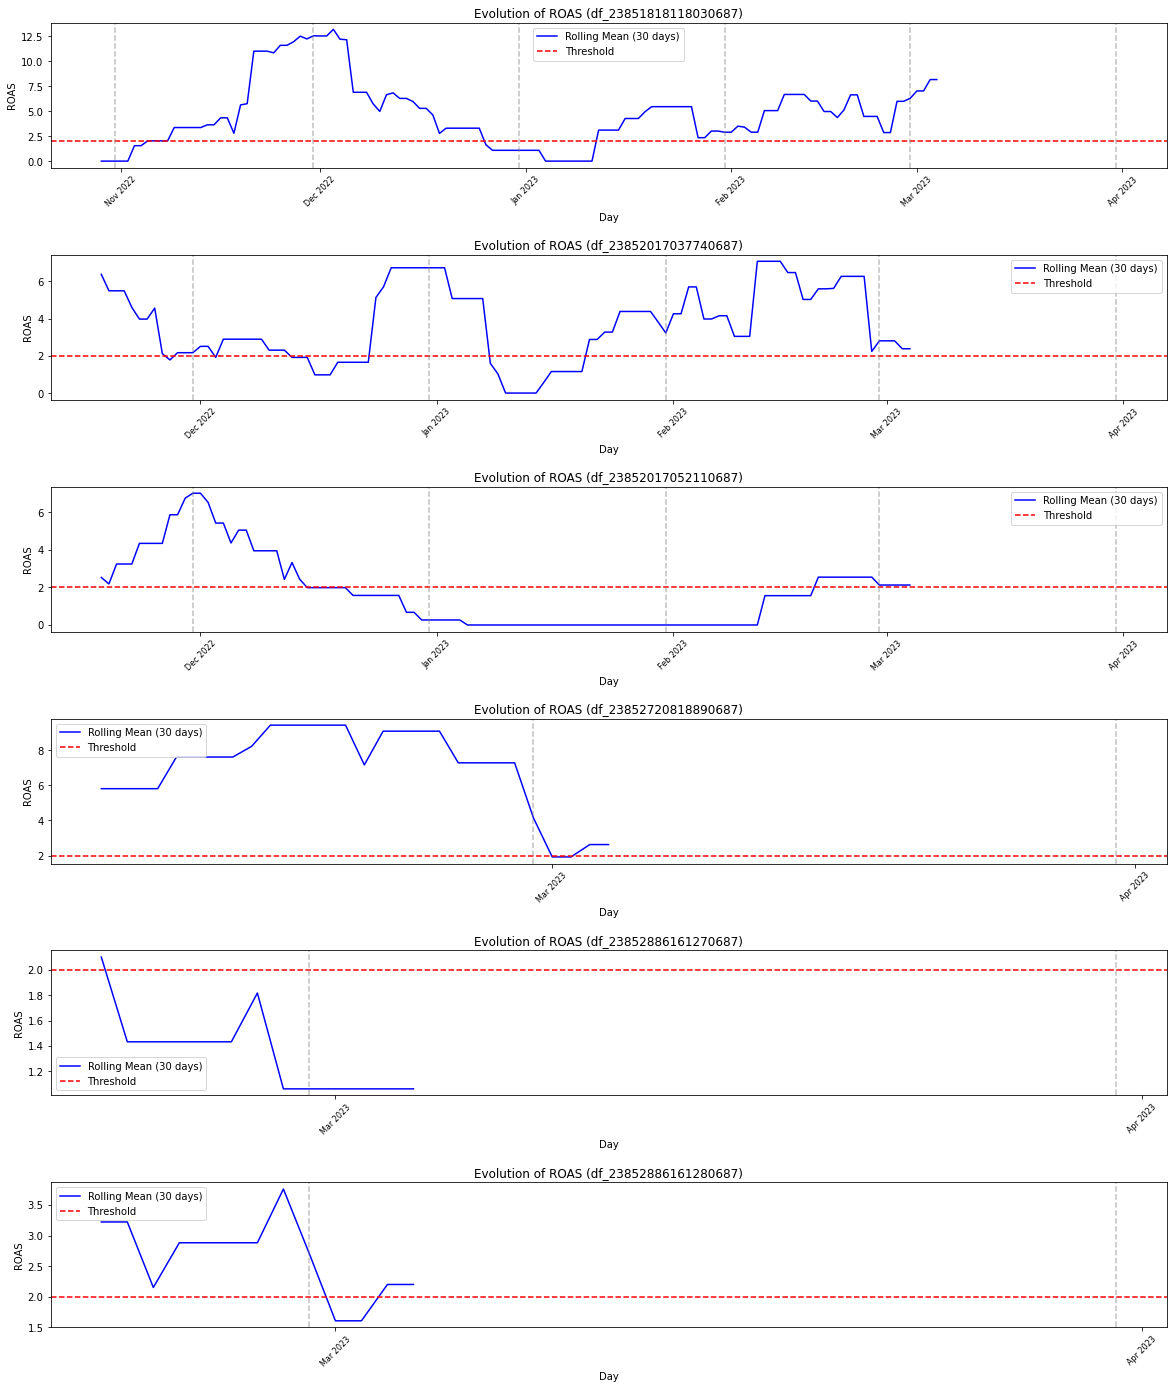

In [151]:
# Define the rolling window size
window_size = 15

# Create a list of axes for subplots
fig, axes = plt.subplots(len(dfs), 1, figsize=(20, 4*len(dfs)))

# Loop over the dictionary and store each dataframe with the rolling mean in a new dataframe with key name as suffix
for i, (key, value) in enumerate(dfs.items()):
    df_name = f"df_{key.split('-')[1]}"
    globals()[df_name] = value
    globals()[df_name] = globals()[df_name][globals()[df_name].Day>=globals()[df_name].Starts]
    globals()[df_name].set_index('Day', inplace=True)
    globals()[df_name].fillna(0, inplace=True)
    globals()[df_name]['ROAS_Rolling_Mean'] = globals()[df_name]['Website purchase ROAS (return on ad spend)'].rolling(window=window_size).mean()

    # Plot the lineplot for each dataframe with the rolling mean
    ax = axes[i]
    ax.plot(globals()[df_name]['ROAS_Rolling_Mean'], color='b', label='Rolling Mean (30 days)')
    ax.axhline(y=2, color='r', linestyle='--', label='Threshold')
    ax.set_title(f'Evolution of ROAS ({df_name})')
    ax.set_xlabel('Day')
    ax.set_ylabel('ROAS')

    # Set the x-axis to show only the month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
        # Add vertical lines between months
    for month in globals()[df_name]['ROAS_Rolling_Mean'].resample('M').mean().index:
        ax.axvline(month, linestyle='--', color='grey', alpha=0.5)
    

    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend()

fig.subplots_adjust(hspace=0.6)
plt.show()

# Average ROAS by weekday for each ad set :

In [73]:
# Loop over the dictionary and store each dataframe with the rolling mean in a new dataframe with key name as suffix
for i, (key, value) in enumerate(dfs.items()):
    df_name = f"df_{key.split('-')[1]}"
    globals()[df_name] = value
    print(df_name)
    globals()[df_name] = globals()[df_name][globals()[df_name].Day>=globals()[df_name].Starts]
    globals()[df_name].set_index('Day', inplace=True)
    globals()[df_name].fillna(0, inplace=True)
    globals()[df_name]['weekday'] = globals()[df_name].index.strftime('%A')
    weekday_ROAS = globals()[df_name].groupby('weekday')['Website purchase ROAS (return on ad spend)'].mean().sort_values(ascending=False)
    display(weekday_ROAS)

df_23851818118030687


C:\Users\H34475\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-73-ac449f75353c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['weekday'] = globals()[df_name].index.strftime('%A')


weekday
Monday       7.890643
Sunday       7.328061
Thursday     7.049805
Saturday     3.803700
Wednesday    2.300116
Friday       2.232482
Tuesday      1.829162
Name: Website purchase ROAS (return on ad spend), dtype: float64

df_23852017037740687


weekday
Sunday       5.432900
Friday       4.964564
Monday       4.858673
Saturday     4.615935
Wednesday    2.937279
Thursday     1.772306
Tuesday      1.562824
Name: Website purchase ROAS (return on ad spend), dtype: float64

df_23852017052110687


weekday
Tuesday      3.715971
Sunday       2.282204
Monday       2.251255
Wednesday    1.968318
Friday       1.205450
Thursday     0.791639
Saturday     0.000000
Name: Website purchase ROAS (return on ad spend), dtype: float64

df_23852720818890687


weekday
Monday       15.193450
Sunday        6.322612
Saturday      5.665916
Tuesday       5.568119
Thursday      4.510652
Friday        1.762370
Wednesday     0.000000
Name: Website purchase ROAS (return on ad spend), dtype: float64

df_23852886161270687


weekday
Sunday       5.691266
Saturday     2.545858
Monday       2.500243
Friday       0.000000
Thursday     0.000000
Tuesday      0.000000
Wednesday    0.000000
Name: Website purchase ROAS (return on ad spend), dtype: float64

df_23852886161280687


weekday
Tuesday      8.107019
Monday       7.264807
Thursday     2.736301
Friday       2.224766
Saturday     0.000000
Sunday       0.000000
Wednesday    0.000000
Name: Website purchase ROAS (return on ad spend), dtype: float64

# Average ROAS by weekday across all ad sets :

In [139]:
df_list = []
# Loop over the dictionary and store each dataframe with the rolling mean in a new dataframe with key name as suffix
for i, (key, value) in enumerate(dfs.items()):
    df_name = f"df_{key.split('-')[1]}"
    globals()[df_name] = value
    globals()[df_name] = globals()[df_name][globals()[df_name].Day >= globals()[df_name].Starts]
    globals()[df_name].set_index('Day', inplace=True)
    globals()[df_name].fillna(0, inplace=True)
    df_list.append(globals()[df_name])

l = []
for i in df_list:
    i = i[i.index>=i.Starts]
#     i = i[i.index>="2023-03-01"]
    l.append(i)
    
# Concatenate all dataframes into a single dataframe
df_concat = pd.concat(l)

# Set the index to the datetime column
# df_concat.set_index('Day', inplace=True)

# Fill any missing values with 0
df_concat.fillna(0, inplace=True)

# Extract the weekday from the index
df_concat['weekday'] = df_concat.index.strftime('%A')

# Calculate the mean ROAS for each weekday
weekday_ROAS = df_concat.groupby('weekday')['Website purchase ROAS (return on ad spend)'].mean().sort_values(ascending=False)

# Display the result
weekday_ROAS

weekday
Monday       6.013273
Sunday       5.041325
Thursday     3.273416
Saturday     2.917513
Tuesday      2.825876
Friday       2.502617
Wednesday    1.902904
Name: Website purchase ROAS (return on ad spend), dtype: float64

Text(0, 0.5, 'ROAS')

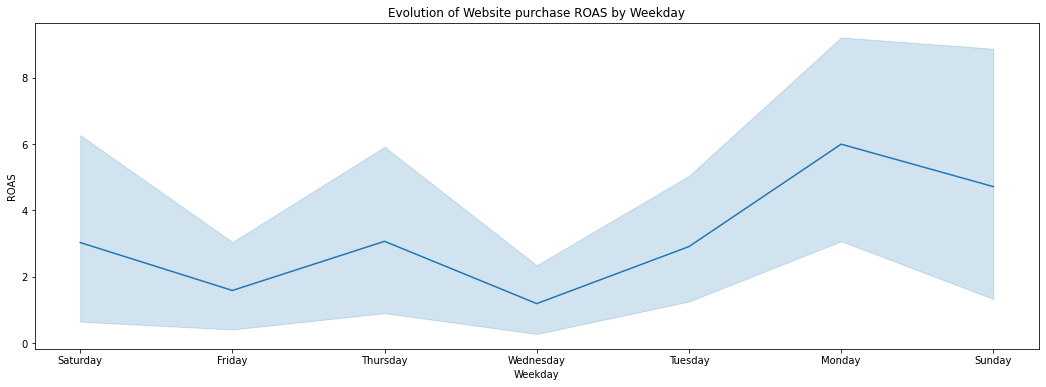

In [137]:
plt.figure(figsize=(18, 6))

# Create a lineplot with weekday on the x-axis and ROAS on the y-axis
sns.lineplot(x='weekday', y='Website purchase ROAS (return on ad spend)', data=df_concat)


# Set the title and axis labels
plt.title('Evolution of Website purchase ROAS by Weekday')
plt.xlabel('Weekday')
plt.ylabel('ROAS')